In [1]:
from numpy import linspace
from matplotlib.pyplot import plot, title, legend, grid, xlabel, ylabel, xticks, yticks
from scipy.integrate import solve_ivp

# Problem 1

Write the rate law for each step.

$A+S\rightarrow A\cdot S$, rate: $R_{AA}=K_{AA}\left(P_AC_S-\frac{C_{AS}}{K_{AA}}\right)$

$A\cdot S+S\rightarrow B\cdot S+C\cdot S$, rate: $r_S=k_S\left(C_{AS}-\frac{C_{BS}C_{CS}}{K_S}\right)$

$B\cdot S\rightarrow B+S$, rate: $r_{DB}=k_{DB}\left(C_{BS}-\frac{P_BC_S}{K_{DB}}\right)$

$C\cdot S\rightarrow C+S$, rate: $r_{DC}=k_{DC}\left(C_{CS}-\frac{P_CC_S}{K_{DC}}\right)$

Substitute:

$C_{AS}=K_{AA}P_AC_S$

$C_{BS}=\frac{P_BC_S}{K_{DB}}=K_{AB}P_BC_S$

$C_{CS}=\frac{P_CC_S}{K_{DC}}=K_{AC}P_CC_S$

$r_S=k_S\left(K_{AA}P_AC_S^2-\frac{P_BP_CC_S^2}{K_SK_{DB}K_{DC}}\right)$

$K_{eq}=K_SK_{AA}K_{DB}K_{DC}$

$r_S=k_SK_{AA}C_S^2\left(P_A-\frac{P_BP_C}{K_{eq}}\right)$

Site balance:

$C_T=C_S+C_{AS}+C_{BS}+C_{CS}$

$C_T=C_S+K_{AA}P_AC_S+\frac{P_BC_S}{K_{DB}}+\frac{P_CC_S}{K_{DC}}$

$C_S=\frac{C_T}{1+K_{AA}{P_A}+K_{AB}{P_B}+K_{AC}{P_C}}$

$r=\frac{k_SK_{AA}C_T^2\left(P_A-\frac{P_BP_C}{K_{eq}}\right)}{\left(1+K_{AA}{P_A}+K_{AB}{P_B}+K_{AC}{P_C}\right)^2}$

At initial conditions:

$P_{B0}=P_{C0}=0$

$r=\frac{k_SK_{AA}C_T^2P_{A0}}{\left(1+K_{AA}P_{A0}\right)^2}$

Text(0.5, 1.0, 'Problem 1 Sample Plot')

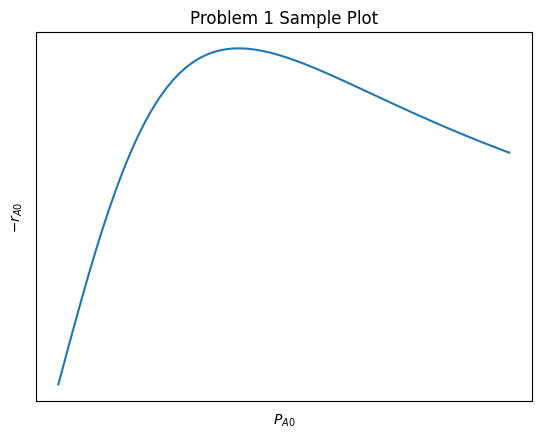

In [2]:
P = linspace(0, 2.5, 100)
r = lambda P: P / (1 + P**2)

plot(P, r(P))
xticks([])
yticks([])
xlabel(r"$P_{A0}$")
ylabel(r"$-r_{A0}$")
title("Problem 1 Sample Plot")

The shape of the plot from the equation is the same as the experimental data. This relationship is consistent because at low values of $P_{A0}$ the reaction rate is slow due to a low concentration of A. At high value of $P_{A0}$, there are a smaller number of catalytic sites available which limits the rate of the reaction, and so the reaction slows down.

# Problem 2

$F_{A0}\frac{dX}{dW}=-r_A$

$-r_{AS}=k'C_{AS}$

$W=k_c\left(C_A-C_{AS}\right)$

Assume the reaction is mass transfer limited.

$W=k'C_{AS}$

$k_c\left(C_A-C_{AS}\right)=k'C_{AS}$

$C_{AS}=\frac{k_cC_A}{k_c+k'}$

$-r_{AS}=\frac{k'k_cC_A}{k_c+k'}$

$\text{Sh}=100\text{Re}^{1/2}$

$k_c=\frac{D_e\text{Re}}{d_p}$

$k_c=\frac{D_e}{d_p}100\left(\frac{ud_p}{\upsilon}\right)^{1/2}$

$k_c=\frac{10^{-2}}{0.1}100\left(\frac{10\cdot0.1}{0.02}\right)^{1/2}$

$k_c=70.7$ cm/s

$k_ca=70.7\cdot60$

$k_c=4242.6\text{ cm}^3\text{/g cat/s}$ 

$C_A=C_{A0}\left(\frac{1-X}{1-\epsilon X}\right)$

$\epsilon=0$

$C_A=C_{A0}\left(1-X\right)$

$-r_{AS}=\frac{k'k_cC_{A0}\left(1-X\right)}{k_c+k'}$

$k'=0.01$, $C_{A0}=1$, $F_{A0}=10000$

$-r_{AS}=\frac{0.01\cdot 4242\left(1-X\right)}{4242+0.01}$

$\frac{dX}{dW}=\frac{0.01\cdot 4242\left(1-X\right)}{4242.01\cdot 10000}$

Solve the differential equation.

Final X: 0.6000021918225731


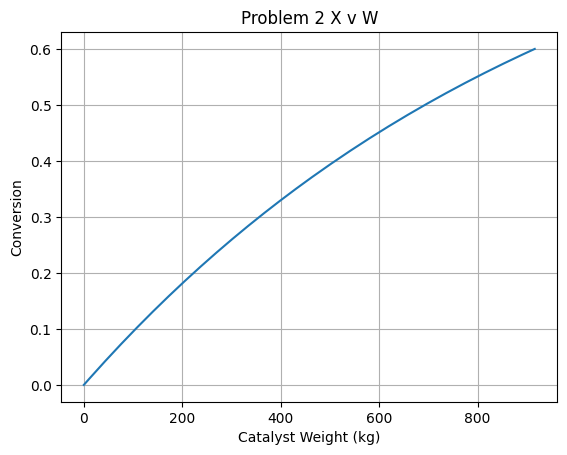

In [40]:
k_c = 1e-2 / 0.1 * 100 * (10 * 0.1 / 0.02)**0.5 * 60
C_A0 = 1
r_A = lambda C_A: -0.01 * k_c * C_A / (4242 + 0.01)
C_A = lambda X: C_A0 * (1 - X)
F_A0 = 10000
p2_ode = lambda t, y: -r_A(C_A(y)) / F_A0

W = 916.16

ode_args = (p2_ode, [0, W*1e3], [0])
ode_kwargs = {
    'method': "Radau",
    'atol': 1e-8,
    'rtol': 1e-8,
}

p2_sol = solve_ivp(*ode_args, **ode_kwargs)

print(f"Final X: {p2_sol.y[0][-1]}")

plot(p2_sol.t/1000, p2_sol.y[0])
xlabel("Catalyst Weight (kg)")
ylabel("Conversion")
title("Problem 2 X v W")
grid()

$k_c$ is 400,000 times larger than k', and so the reaction is external mass transfer limited because the internal diffusion is very fast.

$k_c\propto\frac{d_p^{1/2}}{dp}\propto d_p^{-1/2}$

As the partical diameter increases, $k_c$ becomes smaller.

# Problem 3

## Part A

See end for plot.

## Part B

See end for plot.

$\eta=\frac{1.2}{1.8}=\boxed{0.67}$

## Part C

See end for plot.

$\Omega=\frac{0.2}{0.6}=\boxed{0.33}$

# Problem 4

## Part A

$D_A\frac{d^2C_A}{dz^2}=k$

$\psi=\frac{C_A}{C_{As}}$, $\lambda=\frac{z}{L}$

$C_A=\psi C_{AS}$, $z=\lambda L$

$D_A\frac{d^2\left(\psi C_{AS}\right)}{d\left(\lambda L\right)^2}=k$

$D_A\frac{C_{AS}}{L^2}\frac{d^2\psi}{d\lambda^2}=k$

$\frac{d^2\psi}{d\lambda^2}=\frac{kL^2}{D_AC_{AS}}$

$\frac{d\psi}{d\lambda}=0$ at $\lambda=0$

$\frac{d\psi}{d\lambda}=\frac{kL^2}{D_AC_{AS}}\lambda$

$\psi=\frac{kL^2}{2D_AC_{AS}}\lambda^2+C$

$\psi=1$ at $\lambda=1$

$C=1-\frac{kL^2}{2D_AC_{AS}}$

$\psi=1+\frac{kL^2}{2D_AC_{AS}}\left(\lambda^2-1\right)$

$\phi_0^2=\frac{kL^2}{2D_AC_{AS}}$

$\psi=1+\phi_0^2\left(\lambda^2-1\right)$

## Part B

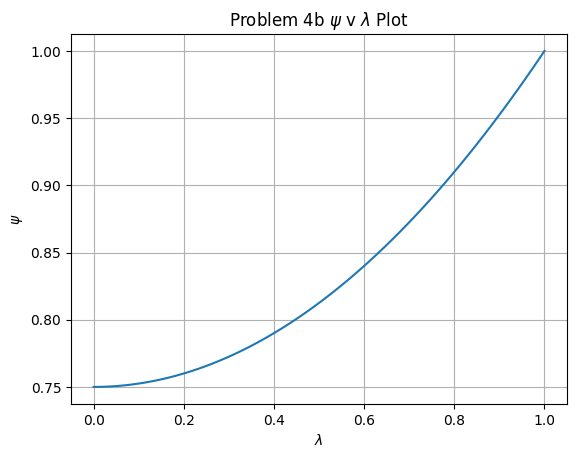

In [27]:
lamba = linspace(0, 1, 100)
phi = 0.5
psi = lambda lamba: 1 + phi**2 * (lamba**2 - 1)

plot(lamba, psi(lamba))
xlabel(r"$\lambda$")
ylabel(r"$\psi$")
title(r"Problem 4b $\psi$ v $\lambda$ Plot")
grid()

## Part C

$\eta$ will be 1 for small values of the Thiele modulus because the reaction becomes external diffusion limited.

## Part D

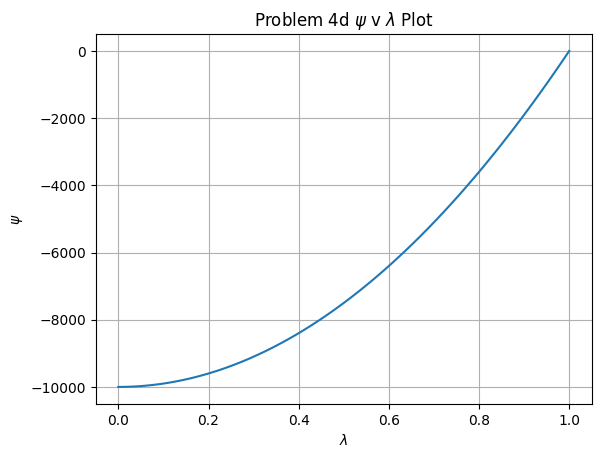

In [28]:
lamba = linspace(0, 1, 100)
phi = 100
psi = lambda lamba: 1 + phi**2 * (lamba**2 - 1)

plot(lamba, psi(lamba))
xlabel(r"$\lambda$")
ylabel(r"$\psi$")
title(r"Problem 4d $\psi$ v $\lambda$ Plot")
grid()

$\psi$ became negative for a large Thiele modulus. It is not possible to have negative concentration values.